In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/HIR/FaceNet_MTCNN_SVM

/content/drive/MyDrive/HIR/FaceNet_MTCNN_SVM


In [3]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 62.8 MB/s eta 0:00:00


In [4]:
import tensorflow as tf
from tensorflow.python.client import device_lib

print("GPU Available: ", tf.test.is_gpu_available())
print(device_lib.list_local_devices())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU Available:  True
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7433150441505084051
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14626652160
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6654848058768505890
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [5]:
import cv2 as cv
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [50]:
img = cv.imread("/content/drive/MyDrive/HIR/FaceNet_MTCNN_SVM/Jack.png")

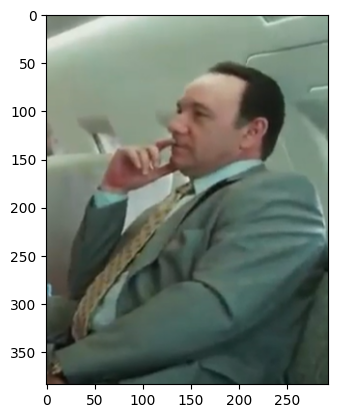

In [51]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [52]:
from mtcnn.mtcnn import MTCNN

detector = MTCNN()
results = detector.detect_faces(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 257ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


In [53]:
results

[{'box': [129, 64, 73, 101],
  'confidence': 0.9999690055847168,
  'keypoints': {'left_eye': (149, 101),
   'right_eye': (173, 102),
   'nose': (147, 121),
   'mouth_left': (145, 141),
   'mouth_right': (165, 142)}}]

In [54]:
x,y,w,h = results[0]['box']

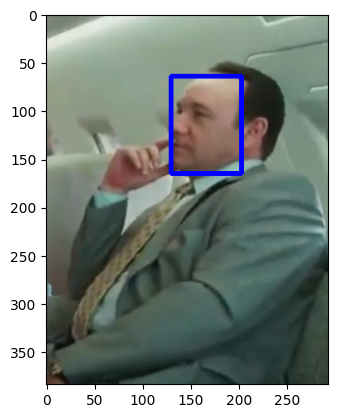

In [55]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 3)
plt.imshow(img)

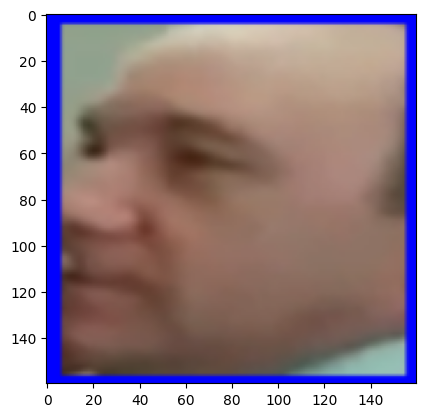

In [56]:
my_face = img[y:y+h, x:x+w]

#Facenet takes as input 160x160
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]], dtype=uint8)
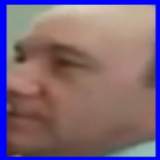

In [57]:
my_face

In [58]:
class FACELOADING:
    def __init__(self, directory):
        self.directory = directory
        self.target_size = (160,160)
        self.X = []
        self.Y = []
        self.detector = MTCNN()


    def extract_face(self, filename):
        img = cv.imread(filename)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        x,y,w,h = self.detector.detect_faces(img)[0]['box']
        x,y = abs(x), abs(y)
        face = img[y:y+h, x:x+w]
        face_arr = cv.resize(face, self.target_size)
        return face_arr


    def load_faces(self, dir):
        FACES = []
        for im_name in os.listdir(dir):
            try:
                path = dir + im_name
                single_face = self.extract_face(path)
                FACES.append(single_face)
            except Exception as e:
                pass
        return FACES

    def load_classes(self):
        for sub_dir in os.listdir(self.directory):
            path = self.directory +'/'+ sub_dir+'/'
            FACES = self.load_faces(path)
            labels = [sub_dir for _ in range(len(FACES))]
            print(f"Loaded successfully: {len(labels)}")
            self.X.extend(FACES)
            self.Y.extend(labels)

        return np.asarray(self.X), np.asarray(self.Y)


    def plot_images(self):
        plt.figure(figsize=(18,16))
        for num,image in enumerate(self.X):
            ncols = 4
            nrows = len(self.Y)//ncols + 1
            plt.subplot(nrows,ncols,num+1)
            plt.imshow(image)
            plt.axis('off')

In [59]:
faceloading = FACELOADING("/content/drive/MyDrive/HIRProject/dataset/interact_person")
X, Y = faceloading.load_classes()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 501ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 638ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [60]:
Y

array(['Bagman-Mr.Sprague', 'Bagman-Mr.Sprague', 'Bagman-Mr.Sprague',
       'Bagman-Mr.Sprague', 'Bagman-Mr.Sprague', 'Bagman-Mr.Sprague',
       'Bagman-Jack', 'Bagman-Jack', 'Bagman-Jack', 'Bagman-Jack',
       'Bagman-Jack', 'Bagman-Jack', 'Bagman-Jack', 'Bagman-Jack',
       'Bagman-Jack', 'Bagman-Jack', 'Bagman-Jack', 'Bagman-Mike',
       'Bagman-Mike', 'Bagman-Mike', 'Bagman-Mike', 'Bagman-Mike',
       'Bagman-Mike', 'Bagman-Mike', 'Bagman-Mike', 'Bagman-Mike',
       'Bagman-Susan', 'Bagman-Susan', 'Bagman-Susan', 'Bagman-Susan',
       'Bagman-Agent Patterson', 'Bagman-Agent Patterson',
       'Bagman-Agent Patterson', 'Bagman-Agent Patterson',
       'Bagman-Agent Patterson', 'Bagman-Snake', 'Bagman-Snake',
       'Bagman-Snake', 'Bagman-Snake', 'Bagman-Man In Jail',
       'Bagman-Man In Jail', 'Bagman-Man In Jail', 'Bagman-Man In Jail',
       'Bagman-Factory_Worker', 'Bagman-Factory_Worker',
       'Bagman-Factory_Worker', 'Bagman-Factory_Worker',
       'Bagman-Tom DeLa

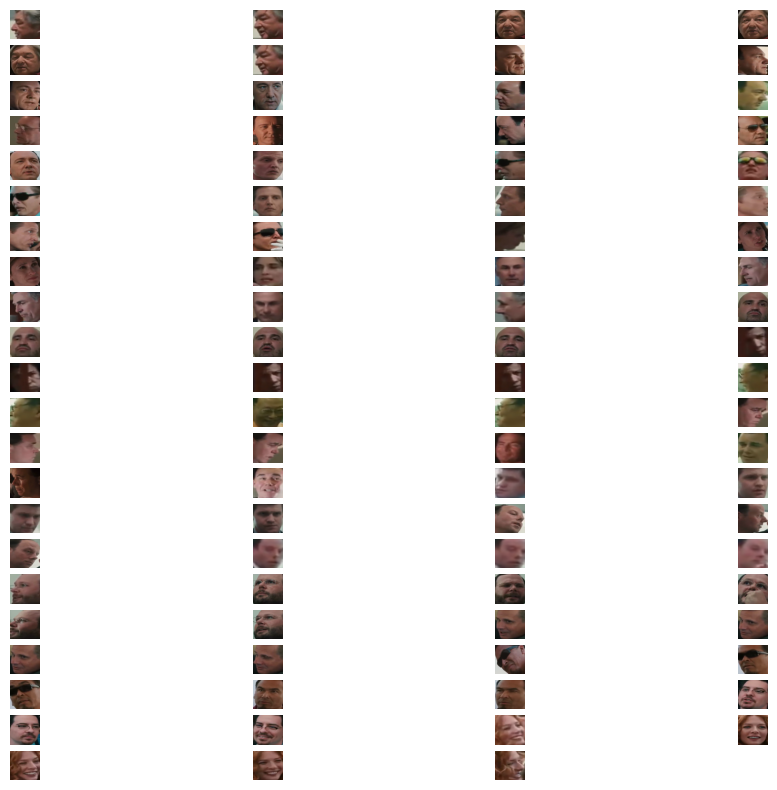

In [62]:
plt.figure(figsize=(12,10))
for num,image in enumerate(X):
    ncols = 4
    nrows = len(Y)//ncols + 1
    plt.subplot(nrows,ncols,num+1)
    plt.imshow(image)
    plt.axis('off')

#FaceNet

In [63]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10367 sha256=cc3e34db5d726f0961d78025521764aabbe2cb21043ae7f9df53d1718243df7c
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [64]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
    face_img = face_img.astype('float32') # 3D(160x160x3)
    face_img = np.expand_dims(face_img, axis=0)
    # 4D (Nonex160x160x3)
    yhat= embedder.embeddings(face_img)
    return yhat[0] # 512D image (1x1x512)

In [65]:
EMBEDDED_X = []

for img in X:
    EMBEDDED_X.append(get_embedding(img))

EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

In [ ]:
np.savez_compressed('faces_embeddings.npz', EMBEDDED_X, Y)

In [66]:
Y

array(['Bagman-Mr.Sprague', 'Bagman-Mr.Sprague', 'Bagman-Mr.Sprague',
       'Bagman-Mr.Sprague', 'Bagman-Mr.Sprague', 'Bagman-Mr.Sprague',
       'Bagman-Jack', 'Bagman-Jack', 'Bagman-Jack', 'Bagman-Jack',
       'Bagman-Jack', 'Bagman-Jack', 'Bagman-Jack', 'Bagman-Jack',
       'Bagman-Jack', 'Bagman-Jack', 'Bagman-Jack', 'Bagman-Mike',
       'Bagman-Mike', 'Bagman-Mike', 'Bagman-Mike', 'Bagman-Mike',
       'Bagman-Mike', 'Bagman-Mike', 'Bagman-Mike', 'Bagman-Mike',
       'Bagman-Susan', 'Bagman-Susan', 'Bagman-Susan', 'Bagman-Susan',
       'Bagman-Agent Patterson', 'Bagman-Agent Patterson',
       'Bagman-Agent Patterson', 'Bagman-Agent Patterson',
       'Bagman-Agent Patterson', 'Bagman-Snake', 'Bagman-Snake',
       'Bagman-Snake', 'Bagman-Snake', 'Bagman-Man In Jail',
       'Bagman-Man In Jail', 'Bagman-Man In Jail', 'Bagman-Man In Jail',
       'Bagman-Factory_Worker', 'Bagman-Factory_Worker',
       'Bagman-Factory_Worker', 'Bagman-Factory_Worker',
       'Bagman-Tom DeLa

#SVM to classify face

In [67]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [68]:
Y

array([ 9,  9,  9,  9,  9,  9,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        8,  8,  8,  8,  8,  8,  8,  8,  8, 13, 13, 13, 13,  0,  0,  0,  0,
        0, 12, 12, 12, 12,  7,  7,  7,  7,  3,  3,  3,  3, 14, 14, 14, 14,
       14, 14, 14,  1,  1,  1,  1,  6,  6,  6,  6,  6,  6,  4,  4,  4,  4,
        4,  4, 11, 11, 11, 11,  2,  2,  2,  2,  2, 10, 10, 10, 15, 15, 15,
       15, 15])

Text(0, 0.5, '9')

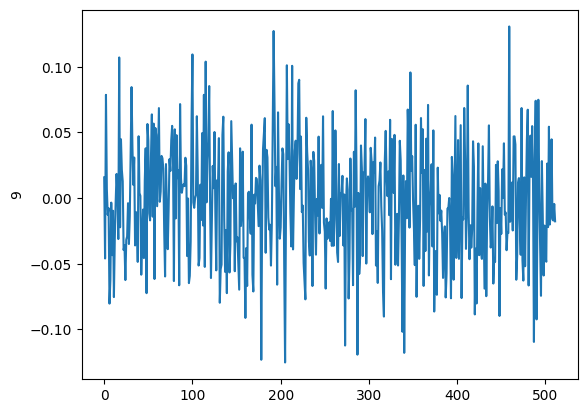

In [69]:
plt.plot(EMBEDDED_X[0])
plt.ylabel(Y[0])

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle=True, random_state=17)

In [71]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)

SVC(kernel='linear', probability=True)

In [72]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [73]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_train, ypreds_train)

1.0

In [74]:
accuracy_score(Y_test, ypreds_test)

0.8181818181818182

#Demo in an image:

In [75]:
t_im = cv.imread("/content/drive/MyDrive/HIR/FaceNet_MTCNN_SVM/Jack.png")
t_im = cv.cvtColor(t_im, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_im)[0]['box']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


In [76]:
t_im = t_im[y:y+h, x:x+w]
t_im = cv.resize(t_im, (160,160))
test_im = get_embedding(t_im)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step


In [77]:
test_im = [test_im]
test_im

[array([ 5.84931709e-02,  5.68966568e-03, -2.08320431e-02, -6.58766776e-02,
         7.57850334e-02, -1.17351087e-02,  3.33614796e-02, -3.23348120e-02,
        -1.25515806e-02, -3.49729359e-02,  5.14413565e-02, -3.99815738e-02,
        -1.38034439e-02, -4.42942977e-02,  3.42511293e-03, -1.20555926e-02,
        -5.44745252e-02, -1.80686731e-02, -7.73177743e-02,  1.24670910e-02,
        -9.04807523e-02, -1.78763922e-02, -1.14982044e-02, -1.01019353e-01,
        -1.01779953e-01, -8.75852827e-04,  2.85433605e-02, -1.10572621e-01,
        -4.90460359e-02, -4.62545939e-02,  6.25493005e-03,  8.09099823e-02,
         2.63526179e-02,  7.53094703e-02, -3.40930652e-03, -3.66501929e-03,
         8.17088783e-02, -1.04907085e-03, -3.88268121e-02, -3.02309524e-02,
        -1.38930161e-03, -4.65879552e-02, -4.65023480e-02, -4.62801978e-02,
        -2.05131434e-02, -3.92196923e-02, -4.34974059e-02, -2.07408084e-04,
        -2.22913660e-02, -6.03864491e-02, -5.60727641e-02, -4.88737896e-02,
        -6.5

In [78]:
ypreds = model.predict(test_im)
ypreds

array([5])

In [79]:
person_name = encoder.inverse_transform(ypreds)
print('Prediction:', person_name[0])

Prediction: Bagman-Jack


In [ ]:
#save the model
import pickle

with open('svm_model_160x160.pkl','wb') as f:
    pickle.dump(model,f)